In [1]:
import pickle
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
from periodictable import elements

In [2]:
import exfor_tools

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [3]:
from query_elastic import print_failed_parses, query_elastic_data, reattempt_parse

In [4]:
import jitr

In [5]:
proton = (1, 1)
neutron = (1, 0)

In [6]:
target = (208, 82)

In [7]:
(
    (entries_pp, failed_parses_pp),
    (entries_ppr, failed_parses_ppr),
    (entries_nn, failed_parses_nn),
) = query_elastic_data(target)


Parsing (p,p) ...
Found subentry C0081005 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry C0893042 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'ERR-S']
Found subentry E1201014 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry E1846023 with the following columns:
['EN-RSL', 'E-RSL', 'E-LVL-ERR', 'EN', 'ANG-CM', 'DATA-CM']
Found subentry O0032025 with the following columns:
['EN', 'ANG-CM', 'DATA', 'ERR-S']
Found subentry O0049012 with the following columns:
['EN', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ERR-T', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM']
Failed to parse subentry O0049012:
	Ambiguous statistical error labels:
MONIT-ERR, ERR-T, ERR-DIG
Found subentry O0142011 with the following columns:
['EN', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-T']
Failed to parse subentry O0142011:
	Ambiguous statistical error labels:
ERR-1, ERR-T
Found subentry O0157004 with the following columns:
['EN', 'ANG-ERR', 'DATA-ERR', '

# $(p,p)$

## Handle failed parses for $(p,p)$

In [8]:
print_failed_parses(failed_parses=failed_parses_pp)

Entry: O0049
Ambiguous statistical error labels:
MONIT-ERR, ERR-T, ERR-DIG
Entry: O0142
Ambiguous statistical error labels:
ERR-1, ERR-T
Entry: O0208
Ambiguous statistical error labels:
ERR-1, ERR-2
Entry: O0285
Ambiguous statistical error labels:
DATA-ERR, MONIT-ERR
Entry: T0101
Ambiguous statistical error labels:
DATA-ERR1, DATA-ERR


In [9]:
entries_pp["O0049"] = reattempt_parse(
    failed_parses_pp["O0049"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-DIG", "ERR-T"],
        "systematic_err_labels": ["MONIT-ERR"],
    },
)

Found subentry O0049012 with the following columns:
['EN', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ERR-T', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM']


In [10]:
entries_pp["O0142"] = reattempt_parse(
    failed_parses_pp["O0142"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0142011 with the following columns:
['EN', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [11]:
entries_pp["O0208"] = reattempt_parse(
    failed_parses_pp["O0208"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-2"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0208009 with the following columns:
['EN', 'ERR-1', 'ANG-ERR', 'ANG-CM', 'DATA-CM', 'ERR-2']


In [12]:
entries_pp["O0285"] = reattempt_parse(
    failed_parses_pp["O0285"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["MONIT-ERR"],
    },
)

Found subentry O0285002 with the following columns:
['EN', 'EN-RSL-FW', 'DATA-ERR', 'MONIT', 'MONIT-ERR', 'ANG-CM', 'DATA-CM']


In [13]:
entries_pp["T0101"] = reattempt_parse(
    failed_parses_pp["T0101"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["DATA-ERR1"],
    },
)

Found subentry T0101004 with the following columns:
['DATA-ERR1', 'EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR']


## Reject none-useful, discrepant our outlying experiments

# $(p,p)$ ratio

## handle failed parses for $(p,p)$ ratio

In [14]:
print_failed_parses(failed_parses=failed_parses_ppr)

Entry: O0211
Ambiguous statistical error labels:
DATA-ERR, ERR-T
Entry: O0287
Ambiguous statistical error labels:
ERR-1, DATA-ERR
Entry: O0302
Ambiguous statistical error labels:
DATA-ERR1, DATA-ERR2, ERR-DIG
Entry: O0552
Ambiguous statistical error labels:
DATA-ERR, ERR-T


In [15]:
entries_ppr["O0211"] = reattempt_parse(
    failed_parses_ppr["O0211"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR", "ERR-T"],
    },
)

Found subentry O0211009 with the following columns:
['EN', 'EN-RSL', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


In [16]:
entries_ppr["O0287"] = reattempt_parse(
    failed_parses_ppr["O0287"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0287002 with the following columns:
['EN', 'ERR-1', 'DATA-ERR', 'EN-RSL-FW', 'ANG-CM', 'DATA']


In [17]:
entries_ppr["O0302"] = reattempt_parse(
    failed_parses_ppr["O0302"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1", "ERR-DIG"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry O0302002 with the following columns:
['EN', 'DATA-ERR1', 'DATA-ERR2', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA']


In [18]:
entries_ppr["O0552"] = reattempt_parse(
    failed_parses_ppr["O0552"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR", "ERR-T"],
    },
)

Found subentry O0552008 with the following columns:
['EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


## Reject non-useful, discrepant our outlying experiments

In [19]:
#  entries_to_ignore = ['O0490','C1019']

del entries_ppr["O0490"]

## handle failed parses for $(n,n)$ ratio

In [20]:
print_failed_parses(failed_parses=failed_parses_nn)

Entry: 12701
Ambiguous statistical error labels:
DATA-ERR2, DATA-ERR1
Entry: 14317
Ambiguous statistical error labels:
ERR-1, ERR-2, ERR-T
Entry: 22847
Ambiguous statistical error labels:
ERR-2, ERR-3, ERR-T, ERR-S, ERR-1
Entry: 22987
Ambiguous statistical error labels:
ERR-3, ERR-T, ERR-S, ERR-1


In [21]:
entries_nn["12701"] = reattempt_parse(
    failed_parses_nn["12701"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry 12701005 with the following columns:
['DATA-ERR2', 'EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR1']


In [22]:
entries_nn["14317"] = reattempt_parse(
    failed_parses_nn["14317"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-1", "ERR-2"],
    },
)

Found subentry 14317002 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-CM', 'DATA-CM', 'ERR-T']
Found subentry 14317003 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [23]:
# two norm uncertainties are reported, we take the largest
entries_nn["22847"] = reattempt_parse(
    failed_parses_nn["22847"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-2"],
    },
)

Found subentry 22847003 with the following columns:
['EN', 'EN-ERR', 'EN-RSL-FW', 'ERR-2', 'ERR-3', 'ANG-RSL', 'ANG-CM', 'DATA-CM', 'ERR-T', 'ERR-S', 'ERR-1']


In [24]:
entries_nn["22987"] = reattempt_parse(
    failed_parses_nn["22987"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-1", "ERR-3"],
    },
)

Found subentry 22987004 with the following columns:
['EN', 'EN-ERR', 'EN-RSL-FW', 'ERR-3', 'ANG-RSL', 'ANG-CM', 'DATA-CM', 'ERR-T', 'ERR-S', 'ERR-1']


In [25]:
# entries_to_ignore = ['40288', '23059', '22987','14317']
del entries_nn["14317"]  # duplicate

# Plotting

## Plot $(p,p)$

In [46]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(entries_pp)

In [47]:
[[m.Einc for m in l] for l in measurements_categorized]

[[16.0],
 [30.3],
 [30.8],
 [35.0],
 [39.7],
 [40.0],
 [55.09],
 [61.4],
 [65.0, 65.0],
 [80.0],
 [121.0],
 [155.0],
 [156.0],
 [160.0],
 [182.0],
 [200.0, 200.0]]

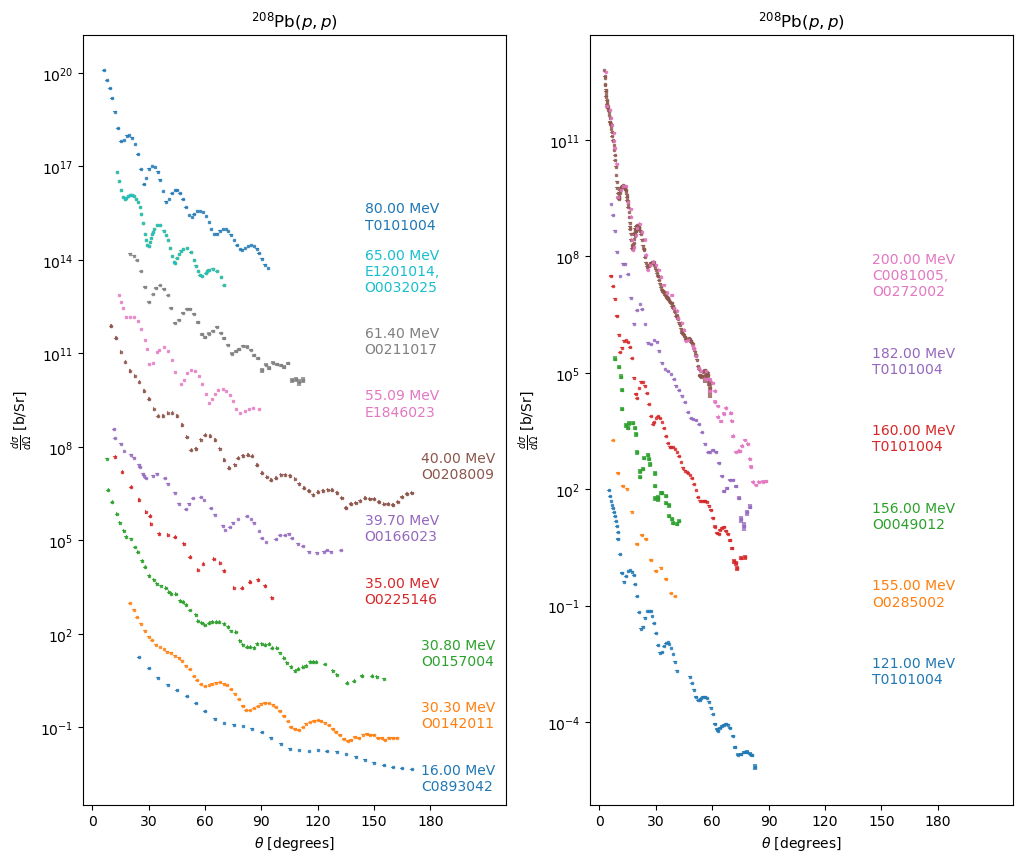

In [48]:
n_per_plot = 10
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 10))
if not isinstance(axes, np.ndarray):
    axes = [axes]
for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N
    else:
        idxf = (i + 1) * n_per_plot

    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=100,
        data_symbol=list(entries_pp.values())[0].data_symbol,
        rxn_label=list(entries_pp.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 0.001,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
    axes[i].set_xlim([-5, 220])

## Handle outliers

In [29]:
print(entries_pp['O0142'].measurements[0].y[:10])
entries_pp['O0142'].measurements[0].y[3] *= 0.1
entries_pp['O0142'].measurements[0].y_err[3] *= 0.1
entries_pp['O0142'].measurements[0].notes = ["12th to last pt decreased by factor of 10"]

[ 9.539   6.037   3.374  21.561   1.264   0.8222  0.6223  0.4491  0.3806
  0.3291]


## plot $(p,p)$ ratio

In [40]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(
    entries_ppr, min_num_pts=4
)

In [41]:
[[(m.subentry, m.Einc) for m in l] for l in measurements_categorized]

[[('O0552008', 12.98)],
 [('C1019035', 22.2)],
 [('O0788009', 49.35)],
 [('O0211009', 61.4)],
 [('O0300002', 100.4)],
 [('O0302002', 160.0)],
 [('O0287002', 185.0)]]

(0.0, 70.0)

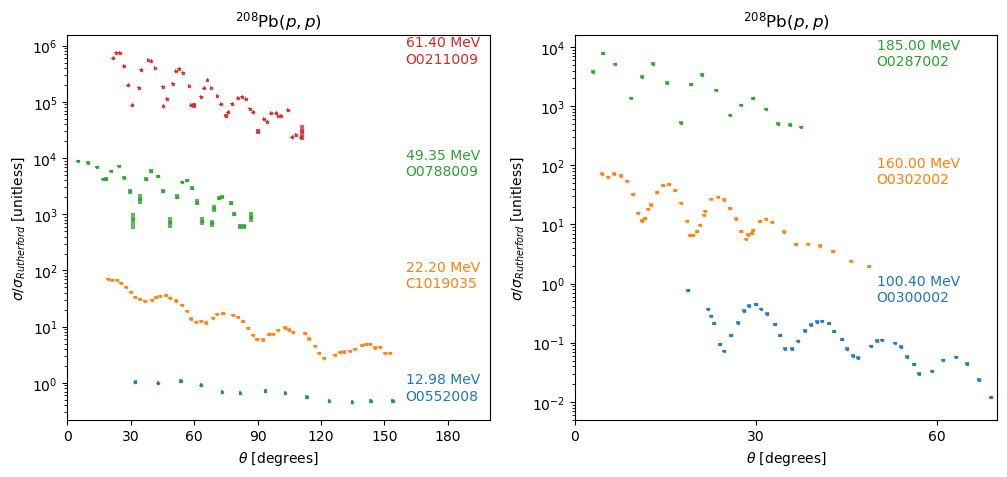

In [42]:
n_per_plot = 4
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1

label_xloc= [160,50]

fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 5))
if not isinstance(axes,np.ndarray):
    axes = [axes]

for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N 
    else:
        idxf = (i + 1) * n_per_plot
    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=100,
        data_symbol=list(entries_ppr.values())[0].data_symbol,
        rxn_label=list(entries_ppr.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": label_xloc[i],
            "label_offset_factor": 0.5,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
   # axes[i].set_xlim([-5, 220])
axes[0].set_xlim([0,200])
axes[-1].set_xlim([0,70])

## Handle outliers

In [33]:
print(entries_ppr['O0211'].measurements[0].y[-20:])
entries_ppr['O0211'].measurements[0].y[-12] *= 0.1
entries_ppr['O0211'].measurements[0].y_err[-12] *= 0.1
entries_ppr['O0211'].measurements[0].notes = ["12th to last pt decreased by factor of 10"]

[0.057  0.0658 0.0926 0.1167 0.124  0.112  0.0757 0.0658 0.3    0.0493
 0.0442 0.0622 0.0627 0.0561 0.0564 0.0712 0.0233 0.0262 0.0236 0.03  ]


## Plot $(n,n)$

In [43]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(
    entries_nn, min_num_pts=5
)

In [44]:
[[m.Einc for m in l] for l in measurements_categorized]

[[11.0],
 [13.9],
 [16.9],
 [20.0, 20.0],
 [22.0],
 [24.0],
 [26.0],
 [30.3],
 [40.0],
 [65.0],
 [75.0],
 [85.0],
 [95.0],
 [96.0, 96.0],
 [107.5],
 [127.5],
 [155.0],
 [185.0]]

(0.0, 90.0)

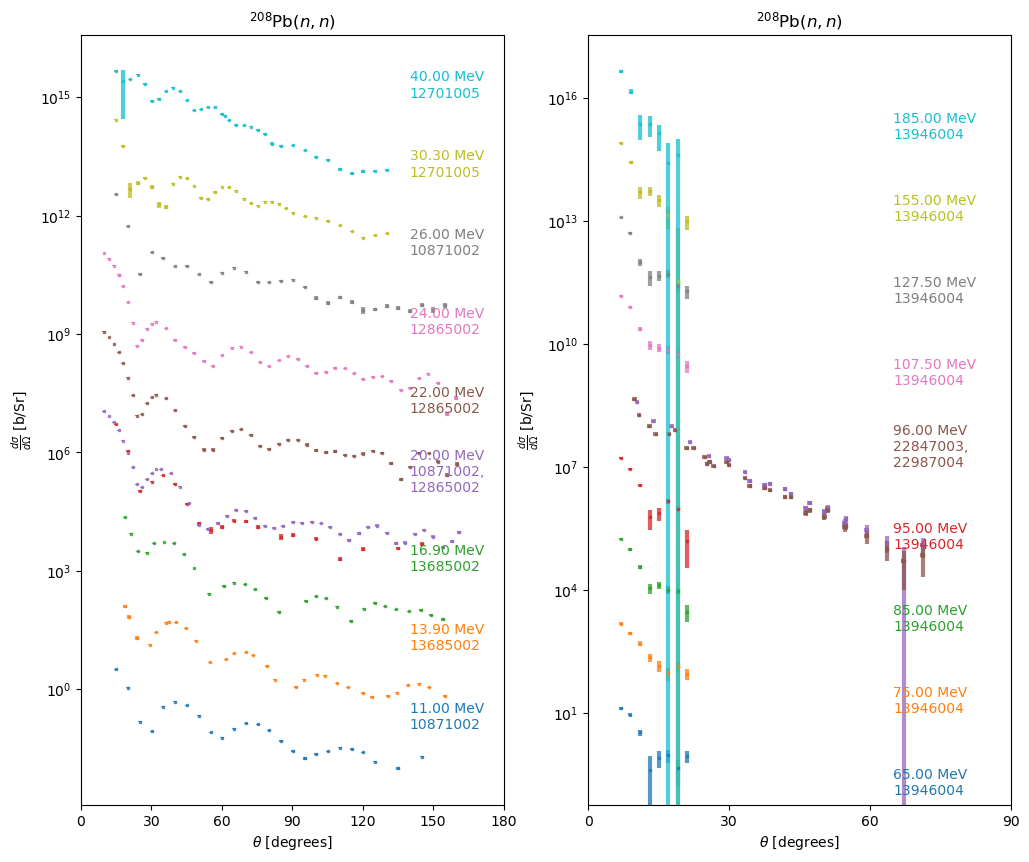

In [45]:
n_per_plot = 9
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1
label_xloc = [140, 65]

fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 10))
if not isinstance(axes, np.ndarray):
    axes = [axes]

for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N
    else:
        idxf = (i + 1) * n_per_plot

    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=100,
        data_symbol=list(entries_nn.values())[0].data_symbol,
        rxn_label=list(entries_nn.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": label_xloc[i],
            "label_offset_factor": 0.1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
# axes[0].set_xlim([-20, 180])
axes[1].set_xlim([0, 90])

## Handle outliers

In [37]:
print([m.Einc for m in entries_nn['12701'].measurements])

print(entries_nn['12701'].measurements[1].y[:5])
entries_nn['12701'].measurements[1].y[1] *= 10
entries_nn['12701'].measurements[1].y_err[1] *= 10
entries_nn['12701'].measurements[1].notes = ["2nd point increased by a factor of 10"]

[30.3, 40.0]
[0.4686  0.02562 0.2837  0.3767  0.2158 ]


# Write data to disk

In [38]:
A, Z = target
with open(f"{elements[Z]}{A}_diff_xs.pkl", "wb") as f:
    pickle.dump(
        {"n,n": entries_nn, "p,p": {"absolute": entries_pp, "ratio": entries_ppr}}, f
    )